# **2.3 Modelo No Supervisado: Clusterización**
### **Objetivo: Segmentar a los estudiantes según sus hábitos de estudio y entorno.**

Modelo permitido
- K-Means

Proceso
- Normalización
- Elección del número óptimo de clusters
- Evaluación de la calidad de la clusterización
- Interpretación de los clusters para identificar grupos de riesgo, alto desempeño, etc.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

import scipy.cluster.hierarchy as sch


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Proyecto Final/StudentsPerformance.csv')

## **NORMALIZACION**

In [ ]:
#Generar Variables Dumies
df_d = pd.get_dummies(df)
df_d



,math score,reading score,writing score,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,72,72,74,True,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,True
1,69,90,88,True,False,False,False,True,False,False,False,False,False,False,True,False,False,True,True,False
2,90,95,93,True,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,True
3,47,57,44,False,True,True,False,False,False,False,True,False,False,False,False,False,True,False,False,True
4,76,78,75,False,True,False,False,True,False,False,False,False,False,False,True,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,88,99,95,True,False,False,False,False,False,True,False,False,False,True,False,False,False,True,True,False
996,62,55,55,False,True,False,False,True,False,False,False,False,True,False,False,False,True,False,False,True
997,59,71,65,True,False,False,False,True,False,False,False,False,True,False,False,False,True,False,True,False
998,68,78,77,True,False,False,False,False,True,False,False,False,False,False,True,False,False,True,True,False


In [ ]:

X = df_d
X.columns


Index(['math score', 'reading score', 'writing score', 'gender_female',
       'gender_male', 'race/ethnicity_group A', 'race/ethnicity_group B',
       'race/ethnicity_group C', 'race/ethnicity_group D',
       'race/ethnicity_group E',
       'parental level of education_associate's degree',
       'parental level of education_bachelor's degree',
       'parental level of education_high school',
       'parental level of education_master's degree',
       'parental level of education_some college',
       'parental level of education_some high school', 'lunch_free/reduced',
       'lunch_standard', 'test preparation course_completed',
       'test preparation course_none'],
      dtype='object')

In [ ]:
# Se Crea el obbjeto para Estandarizar Datos
sc=StandardScaler()

# Fit_transform en datos train - Estandariza los Datos
# se usa fit() para calcular la media de desviacion estandar
X_scaled = sc.fit_transform(X)

# Se crea un DataFrame con los valores Estandarizados
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)


## **ELECCIÓN DEL NÚMERO ÓPTIMO DE CLUSTERS**



In [ ]:
# inertia = Medida de que tan compacto estan los Clusters
inertia = []
# Silhoute = Mide la Fidelidad de la separacion de Clusters
silhouette = []

# Se busca un rango entre 2 y 10 clusters optimos
K = range (2,11)

# Probar una cantidad de clusters k de 2 hasta 10.
#    Se crea un modelo K-Means, con el numero de cluster seleecionado,
#    se entrena, se calcula la inercia, Se calcula su silhouette
for k in K:
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=300, random_state=1)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_scaled,kmeans.labels_))

### Graficar para poder enocntrar el Cluster Optimo

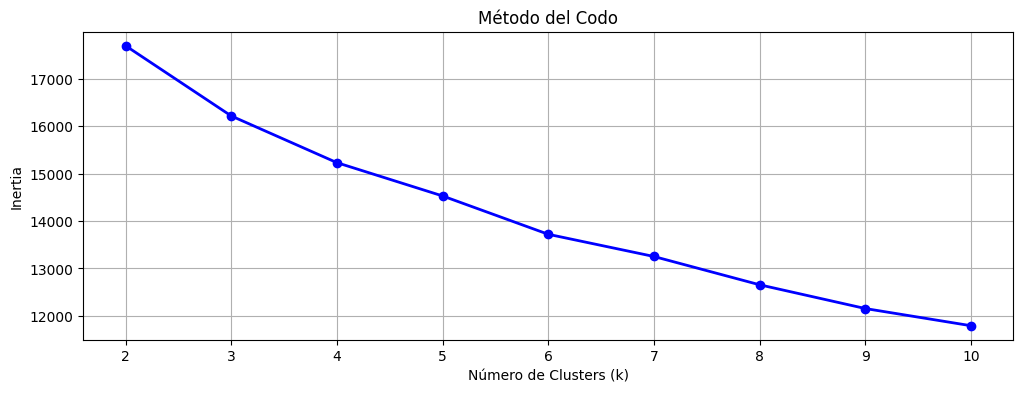

In [ ]:
#Graficar por MÉTODO DEL CODO
plt.figure(figsize=(12,4))
plt.plot(K, inertia, 'bo-', linewidth=2)
plt.grid(True)
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inertia')
plt.title('Método del Codo')
plt.show()

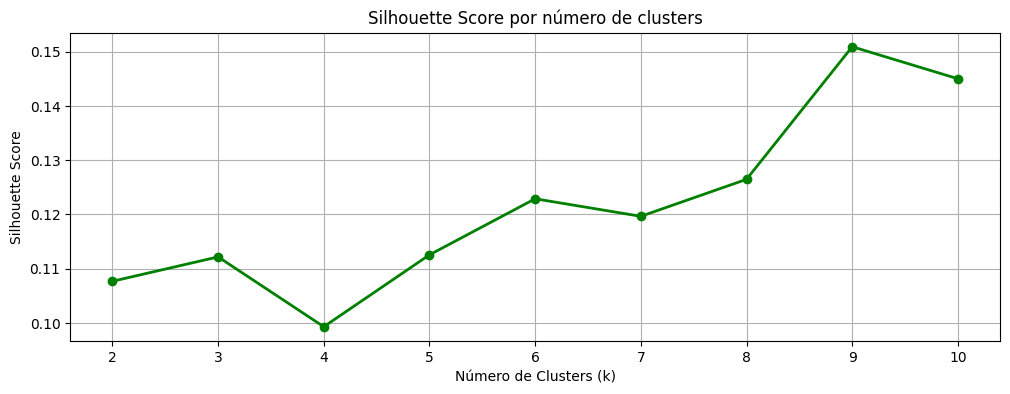

In [ ]:
# Graficar por ÍNDICE DE SILUTETTE
plt.figure(figsize=(12,4))
plt.plot(K, silhouette, 'go-', linewidth=2)
plt.grid(True)
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score por número de clusters')
plt.show()


### K = **4 - 5**
Al analizar ambas graficas:

el Método del Codo mostró una disminución pronunciada en la inercia entre K = 2 y K = 4, y una reducción más moderada hacia K = 5. A partir de K = 6, la curva pierde intensidad y la mejora se vuelve marginal.

Por otro lado La gráfica de Silhouette mostró valores bajos (0.10–0.15), lo cual indica que el dataset no presenta grupos naturalmente bien separados. Sin embargo, los valores para K = 3, 4 y 5 fueron similares, por lo que ninguno se destaca claramente sobre los demás.

En conjunto, ambas métricas sugieren que el número óptimo de clusters se encuentra entre 3 y 5, siendo K = 4 una opción equilibrada: suficientemente simple para interpretar y lo suficientemente informativa para segmentar a los estudiantes según sus hábitos y entorno educativo.

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
#Crear modelos Kmeans con 3 y 4 Clusters
k3 = KMeans(n_clusters=3, n_init=10, max_iter=300, random_state=1)
k4 = KMeans(n_clusters=4, n_init=10, max_iter=300, random_state=1)


labels_k3 = k3.fit_predict(X_pca)

labels_k4 = k4.fit_predict(X_pca)


In [ ]:
# Transformar centroides al espacio PCA

centroids_k3 = k3.cluster_centers_
centroids_k4 = k4.cluster_centers_


Text(0.5, 1.0, 'K-means con 4 Clusters')

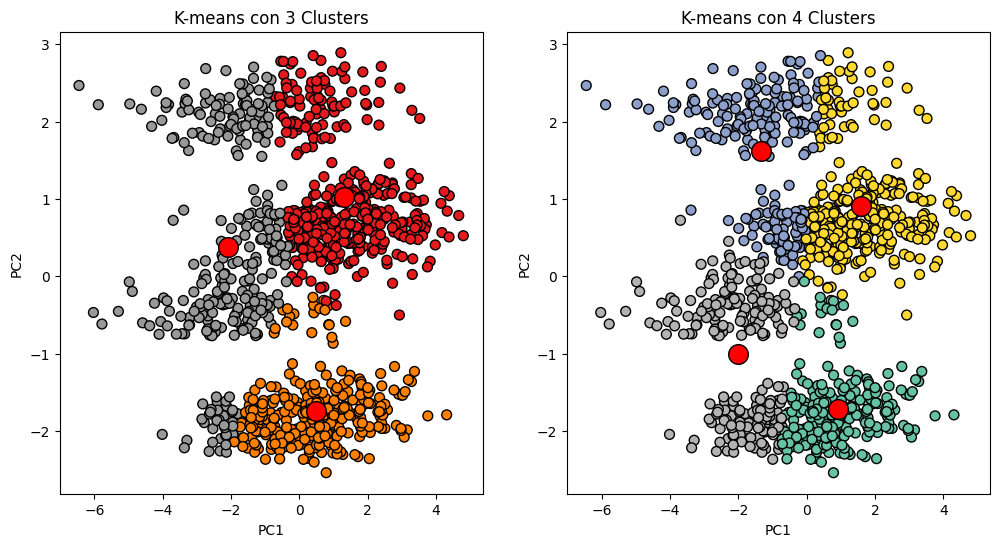

In [ ]:
#Graficar los modelos Kmeans
fig, axes = plt.subplots(1,2, figsize=(12,6))
#Grafico para K1-
axes[0].scatter(X_pca[:,0], X_pca[:,1], c=labels_k3, cmap='Set1', s=50, marker='o', edgecolor='k')
axes[0].scatter(centroids_k3[:,0], centroids_k3[:,1], c='red', marker='o',s=200, edgecolor='k', label='Centroides')
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')

axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')
axes[0].set_title('K-means con 3 Clusters')

# #Gafico para K11
axes[1].scatter(X_pca[:,0], X_pca[:,1], c=labels_k4, cmap='Set2', s=50, marker='o', edgecolor='k')
axes[1].scatter(centroids_k4[:,0], centroids_k4[:,1], c='red', marker='o',s=200, edgecolor='k', label='Centroides')
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('K-means con 4 Clusters')

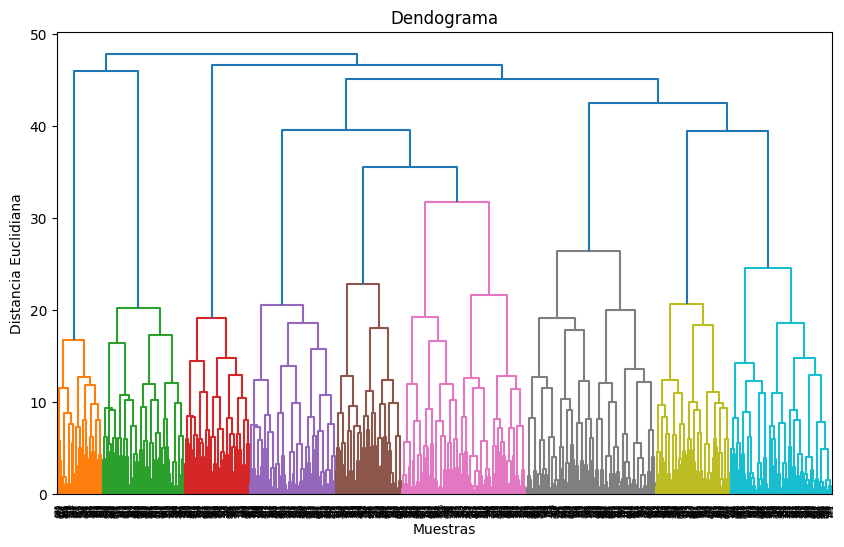

In [ ]:
# Clustered Jerarquico
# Construir un dendograma

plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title('Dendograma')
plt.xlabel('Muestras')
plt.ylabel('Distancia Euclidiana')
plt.show()

Aunque en la proyección de las graficas de PCA  los clusters pueden parecer visualmente mejor y superpuestos para k=2, las métricas cuantitativas (inercia y silhouette) indican que la segmentación con K=6 refleja mejor la estructura interna de los datos en el espacio original de alta dimensionalidad.

In [ ]:
# Agregar la columna cluster al DS de train original
df_clusters = df_d.copy()
df_clusters["cluster"] = labels_k3
df_clusters.head(15)


,math score,reading score,writing score,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,...,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none,cluster
0,72,72,74,True,False,False,True,False,False,False,...,True,False,False,False,False,False,True,False,True,0
1,69,90,88,True,False,False,False,True,False,False,...,False,False,False,True,False,False,True,True,False,0
2,90,95,93,True,False,False,True,False,False,False,...,False,False,True,False,False,False,True,False,True,0
3,47,57,44,False,True,True,False,False,False,False,...,False,False,False,False,False,True,False,False,True,2
4,76,78,75,False,True,False,False,True,False,False,...,False,False,False,True,False,False,True,False,True,1
5,71,83,78,True,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,True,0
6,88,95,92,True,False,False,True,False,False,False,...,False,False,False,True,False,False,True,True,False,0
7,40,43,39,False,True,False,True,False,False,False,...,False,False,False,True,False,True,False,False,True,2
8,64,64,67,False,True,False,False,False,True,False,...,False,True,False,False,False,True,False,True,False,2
9,38,60,50,True,False,False,True,False,False,False,...,False,True,False,False,False,True,False,False,True,2


In [ ]:
cluster_summary = df_clusters.groupby("cluster").mean()
cluster_summary

,math score,reading score,writing score,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
cluster,,,,,,,,,,,,,,,,,,,,
0,70.741026,79.002564,79.397436,0.948718,0.051282,0.043590,0.184615,0.353846,0.269231,0.148718,0.241026,0.151282,0.128205,0.089744,0.238462,0.151282,0.287179,0.712821,0.479487,0.520513
1,75.481481,71.000000,69.047138,0.000000,1.000000,0.084175,0.161616,0.255892,0.289562,0.208754,0.222222,0.121212,0.191919,0.043771,0.225589,0.195286,0.070707,0.929293,0.417508,0.582492
2,51.380192,55.178914,52.977636,0.472843,0.527157,0.150160,0.223642,0.335463,0.226837,0.063898,0.198083,0.073482,0.284345,0.035144,0.210863,0.198083,0.709265,0.290735,0.150160,0.849840


In [ ]:
c0 = df_clusters[df_clusters["cluster"]== 0]
c1 = df_clusters[df_clusters["cluster"]== 1]
c2 = df_clusters[df_clusters["cluster"]== 2]
print("Columnas/No de alumnos en Clusters")
print(f"Cluster 0: {c0.shape[0]}")
print(f"Cluster 1: {c1.shape[0]}")
print(f"Cluster 2: {c2.shape[0]}")

Columnas/No de alumnos en Clusters
Cluster 0: 390
Cluster 1: 297
Cluster 2: 313


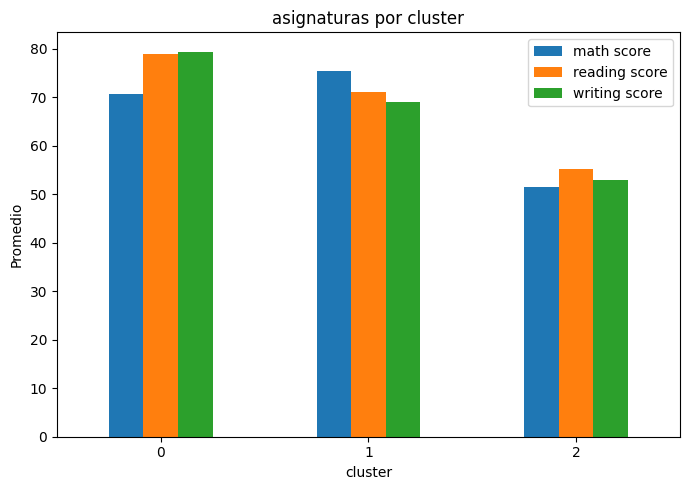

In [ ]:
df_clusters.groupby("cluster")[["math score", "reading score", "writing score"]].mean().plot(
    kind="bar", figsize=(7,5)
)
plt.title("asignaturas por cluster")
plt.xlabel("cluster")
plt.ylabel("Promedio")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
c0_calificaciones = pd.Series({"math score":c0["math score"].mean(),"reading score": c0["reading score"].mean(), "writing score": c0["writing score"].mean()})
c1_calificaciones = pd.Series({"math score":c1["math score"].mean(),"reading score": c1["reading score"].mean(), "writing score": c1["writing score"].mean()})
c2_calificaciones = pd.Series({"math score":c2["math score"].mean(),"reading score": c2["reading score"].mean(), "writing score": c2["writing score"].mean()})

calificaciones_clusters = pd.DataFrame({
    "Cluster 0": c0_calificaciones,
    "Cluster 1": c1_calificaciones,
    "Cluster 2": c2_calificaciones
})
calificaciones_clusters


,Cluster 0,Cluster 1,Cluster 2
math score,70.741026,75.481481,51.380192
reading score,79.002564,71.000000,55.178914
writing score,79.397436,69.047138,52.977636


Al tomar como base los promedios de calificaciones por clúster, se observan diferencias relevantes que permiten interpretar el rendimiento académico de cada grupo:
1. Cluster 0 y Cluster 1 muestran niveles de desempeño similares, ambos con promedios aprobatorios. Sin embargo, aparecen diferencias sutiles pero consistentes:
    - Cluster 0 destaca en lectura y escritura, con los promedios más altos de todo el conjunto.
    - Cluster 1, en cambio, obtiene el mejor promedio en matemáticas.
- Esto sugiere que la separación entre estos dos clústeres podría estar influenciada por los distintos perfiles de habilidad: Lectura y Escrituca con Matermaticas

2. El Cluster 2 muestra una diferencia más marcada. Los promedios en las tres materias son sustancialmente menores, lo que lo distingue como un grupo de bajo rendimiento académico,
tanto en habilidades verbales como matemáticas.


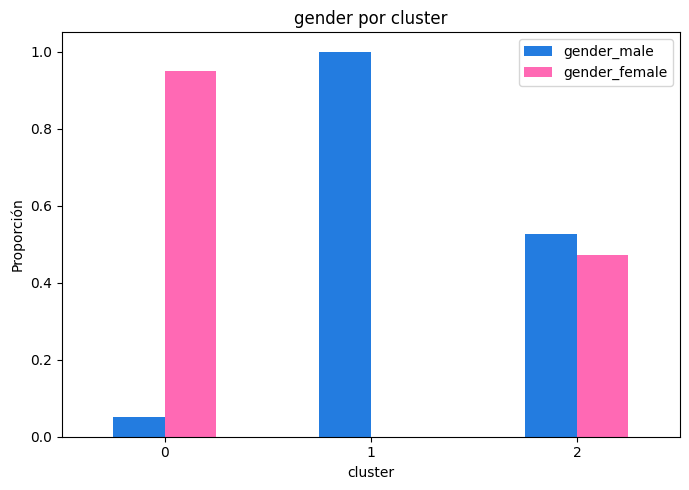

In [ ]:


df_clusters.groupby("cluster")[["gender_male", "gender_female"]].mean().plot(
    kind="bar",
    figsize=(7,5),
    color=["#237ce0", "#ff69b4"]
)

plt.title("gender por cluster")
plt.xlabel("cluster")
plt.ylabel("Proporción")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Al comparar esta gráfica de género con la gráfica previa de calificaciones por clúster, aparecen dos patrones
Los hombres se concentran en el clúster con mejor desempeño en matemáticas, mientras que las mujeres predominan en el clúster con mejores promedios en lectura y escritura. Esto sugiere que los perfiles de rendimiento pueden diferir ligeramente según el género

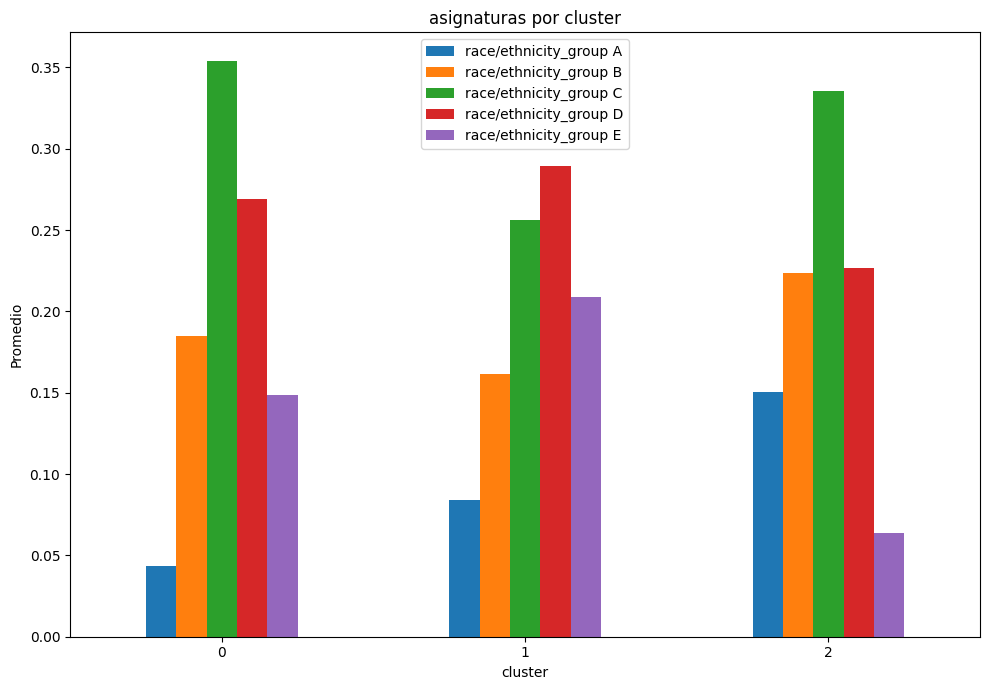

In [ ]:

df_clusters.groupby("cluster")[["race/ethnicity_group A", "race/ethnicity_group B", "race/ethnicity_group C", "race/ethnicity_group D","race/ethnicity_group E"]].mean().plot(
    kind="bar", figsize=(10,7)
)
plt.title("asignaturas por cluster")
plt.xlabel("cluster")
plt.ylabel("Promedio")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
plt.show()





La variable étnico/racial no parece ser un factor determinante en la separación de los clústeres.
Las diferencias entre grupos raciales dentro de cada clúster son relativamente pequeñas y no explican los patrones de rendimiento académico identificados en los clústeres.

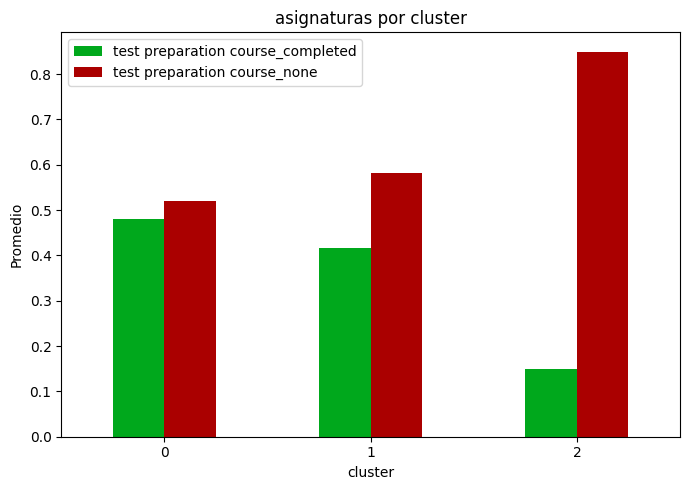

In [ ]:
df_clusters.groupby("cluster")[["test preparation course_completed",	"test preparation course_none"]].mean().plot(
    kind="bar", figsize=(7,5),color=["#00A81C", "#aa0000"]
)
plt.title("asignaturas por cluster")
plt.xlabel("cluster")
plt.ylabel("Promedio")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
plt.show()


El clúster de bajo rendimiento (cluster 2) concentra la mayor proporción de alumnos que no completaron el curso de preparación, lo que sugiere que este hábito podría estar asociado con un peor desempeño académico.

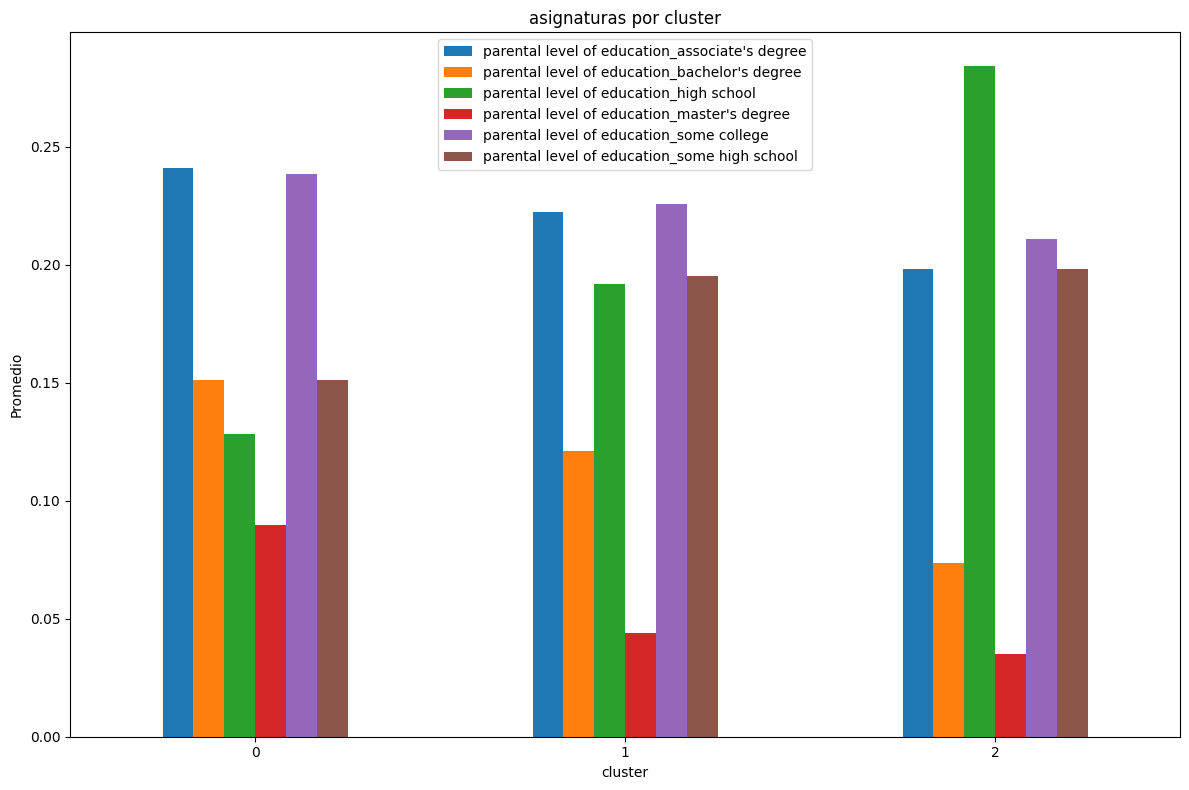

In [ ]:
df_clusters.groupby("cluster")[["parental level of education_associate's degree", "parental level of education_bachelor's degree", "parental level of education_high school", "parental level of education_master's degree","parental level of education_some college", "parental level of education_some high school"]].mean().plot(
    kind="bar", figsize=(12,8)
)
plt.title("asignaturas por cluster")
plt.xlabel("cluster")
plt.ylabel("Promedio")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
plt.show()



1. **some high school** -> Estudio incompleto de preparatoria
2. **high school** -> preparatoria terminada.
3. **some college** -> Estudios universitarios iniciados, pero sin título.
4. **associate’s degree** -> Carrera técnica o grado asociado (2 años)
5. **bachelor’s degree** -> Estudios universitarios con titulo
6. **master’s degree** -> Maestria


In [ ]:
cluster_counts = df_clusters["cluster"].value_counts().sort_index()

highschool_sum = df_clusters.groupby("cluster")["parental level of education_high school"].sum()

highschool_prop = highschool_sum / cluster_counts

tabla_highschool = pd.DataFrame({
    "High School (suma)": highschool_sum,
    "Total alumnos": cluster_counts,
    "Proporción": highschool_prop
})

tabla_highschool["Proporción (%)"] = (tabla_highschool["Proporción"] * 100).round(2)
tabla_highschool.drop(columns="Proporción", inplace=True)

tabla_highschool



,High School (suma),Total alumnos,Proporción (%)
cluster,,,
0,50,390,12.82
1,57,297,19.19
2,89,313,28.43


El nivel educativo de los padres muestra un patrón similar entre los clústeres; sin embargo, al analizar con mayor detalle la categoría high school, se observa que el clúster 2 presenta una proporción más alta de padres cuyo máximo grado académico es la preparatoria.

A simple vista, las gráficas pueden parecer similares, por lo que se realizó un cálculo más preciso:
se obtuvo la suma de padres con nivel high school dentro de cada clúster y se dividió entre el total de alumnos de ese mismo clúster.

Este procedimiento permite obtener proporciones comparables, corrigiendo las diferencias en el tamaño de cada clúster.
Con esta medida, se confirma que el clúster 2 concentra una proporción ligeramente mayor de padres con nivel educativo limitado, en comparación con los clústeres 0 y 1.

Este hallazgo sugiere que el desempeño de los alumnos podría estar influenciado, al menos de manera ligera, por el nivel educativo máximo de sus padres.

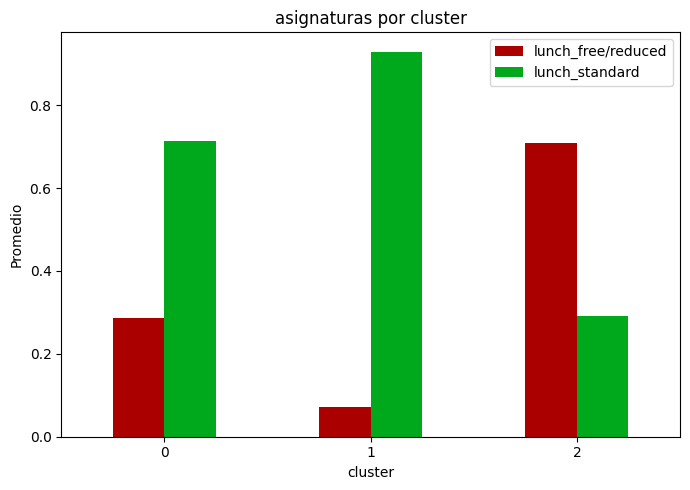

In [ ]:
df_clusters.groupby("cluster")[["lunch_free/reduced",	"lunch_standard"]].mean().plot(
    kind="bar", figsize=(7,5),color=["#aa0000", "#00A81C"]
)
plt.title("asignaturas por cluster")
plt.xlabel("cluster")
plt.ylabel("Promedio")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
plt.show()



La distribución del tipo de lunch según clúster muestra un patrón consistente: los alumnos de los clusters 0 y 1, asociados con mejor desempeño académico, presentan mayor prevalencia de lunch estándar. En contraste, el cluster 2 —vinculado al menor desempeño— concentra una proporción significativamente mayor de lunch free/reduced.



Integrantes:

- Angel 
- Diego 
- Felipe
- Jair Salvador 
- José 
- Yahir 